In [1]:
import pandas as pd
from sklearn import metrics

from joblib import dump, load

Load Saved Model

In [2]:
clf = load('models/sklearn/rf.joblib') 

Load holdout dataset

In [3]:
test = pd.read_csv("data/test.csv")
holdout = pd.read_csv("data/external_Microsoft_holdoutDataset.csv")

In [4]:
test.head()

,Access Level,BD877Training Completed,Department Code,Email Domain,EmployeeTargetedOverPastYear,Gender (code),Social Media Activity (Scaled),behaviorPattern2,fraudTraining Completed,peerUsageMetric6,usageMetric2,usageMetric5
0,3,0.0,39998,si.edu,1.0,0,0.0,0,0,3,3,1
1,2,0.0,10000,slideshare.net,1.0,0,0.0,1,0,6,1,5
2,4,0.0,54997,nsw.gov.au,1.0,1,3.0,2,0,0,2,6
3,5,0.0,24999,ox.ac.uk,1.0,0,1.0,0,0,3,0,5
4,1,1.0,39998,si.edu,1.0,1,0.0,1,0,3,2,3


In [5]:
holdout.head()

,EmployeeTargetedOverPastYear,Access Level,behaviorPattern2,peerUsageMetric6,usageMetric2,usageMetric5,Social Media Activity (Scaled),BD877Training Completed,Department Code,Email Domain,fraudTraining Completed,Gender (code)
0,1.0,2,1,6,1,5,0.0,0.0,10000,slideshare.net,0,0
1,1.0,4,2,0,2,6,3.0,0.0,54997,nsw.gov.au,0,1
2,1.0,1,1,3,2,3,0.0,1.0,39998,si.edu,0,1
3,1.0,4,1,2,1,0,0.0,0.0,69996,ehow.com,1,1
4,1.0,1,0,4,0,0,0.0,0.0,10000,slideshare.net,0,1


In [6]:
# Align holdout dataset columns with test dataset columns
holdout = holdout[test.columns]

Predict on holdout dataset

In [7]:
target_col = "EmployeeTargetedOverPastYear"

X_holdout = holdout.drop(target_col, axis=1)
y_holdout = holdout[[target_col]]

In [8]:
y_holdout_pred = clf.predict(X_holdout)

### Evaluation over testing set

Let's estimate, how accurately the classifier or model can predict on new data.

Accuracy can be computed by comparing actual test set values and predicted values.

In [9]:
metrics.confusion_matrix(y_holdout, y_holdout_pred)

array([[ 295,   87],
       [  29, 1038]])

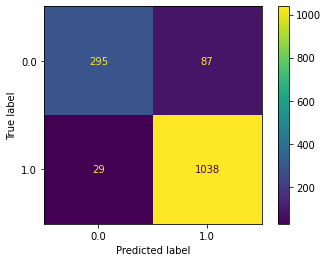

In [10]:
metrics.plot_confusion_matrix(clf, X_holdout, y_holdout)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_holdout, y_holdout_pred))
# Recall
print("Recall:",metrics.recall_score(y_holdout, y_holdout_pred))
# Precision
print("Precison:",metrics.precision_score(y_holdout, y_holdout_pred))
# F1score
print("F1 Score:",metrics.f1_score(y_holdout, y_holdout_pred))

Accuracy: 0.9199447895100069
Recall: 0.9728209934395501
Precison: 0.9226666666666666
F1 Score: 0.9470802919708028


## Saving Predictions

In [12]:
holdout["prediction"] = y_holdout_pred
holdout.to_csv("results/holdout_predictions_rf.csv", index=False)